In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import webbrowser
from sklearn.cluster import KMeans

In [2]:
from my_tests import tabstat

In [93]:
df = pd.read_csv('mall_customers.csv')
df.head()


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [96]:

df.info()
print('\n', df.columns,
 '\n\n', tabstat(3,df.loc[:, 'age':'annual_income']) )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

 Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object') 

                count   mean     std   min    max
age            200.0  38.85  13.969  18.0   70.0
annual_income  200.0  60.56  26.265  15.0  137.0


In [97]:
# Select columns
c1=2
c2=3
X=df.iloc[:, [c1,c2]].values
display(df.columns[c1])
display(df.columns[c2])

'age'

'annual_income'

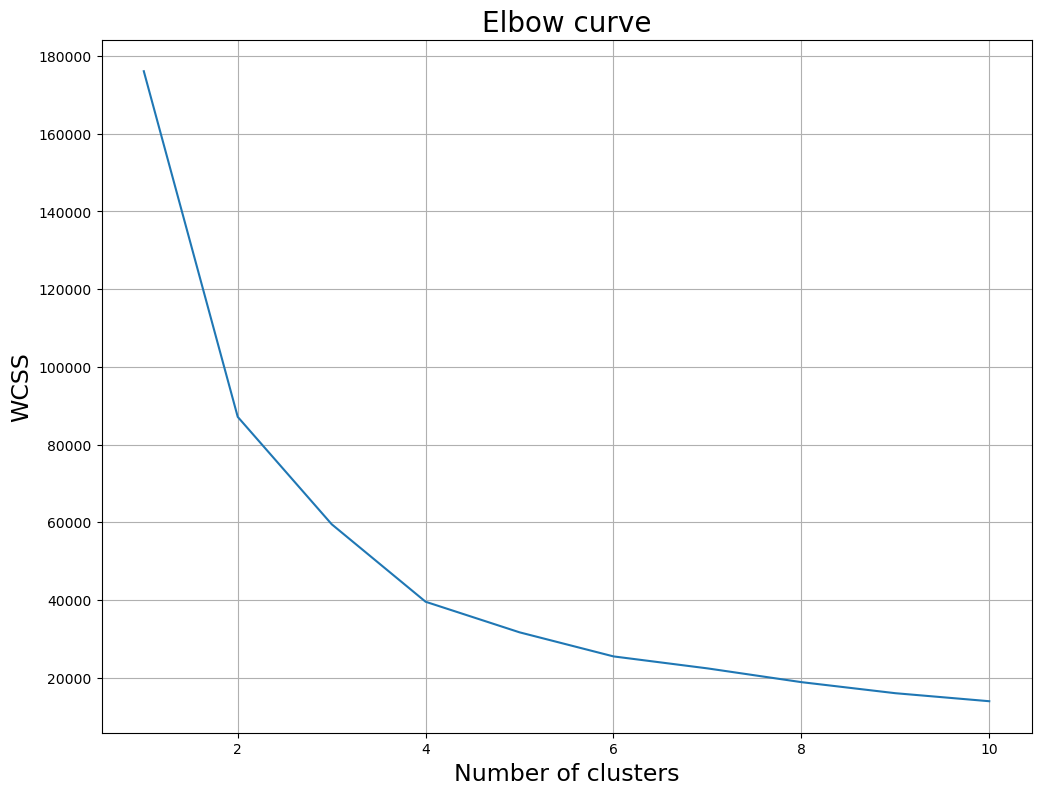

In [98]:
# elbow method to find out the optimal number of clusters
wcss=[]

# compute within cluster sum of squares and
# appended to wcss list
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++',
                     n_init=10, random_state=0)
# n_init is the number of times the K_means algorithm will be
# run with different initial centroid

# kmeans algorithm fits to the X dataset
    kmeans.fit(X)

# inertia_ is sum of squared distances of samples
# to their closest cluster center
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss)
plt.title('Elbow curve', fontsize=20)
plt.xlabel('Number of clusters', fontsize=17)
plt.ylabel('WCSS', fontsize=17)
plt.grid(True)

In [100]:
# According to the Elbow graph we deterrmine
# clusters number
cn=5

# Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=cn, init ='k-means++',
                n_init=10, random_state=0)

# fit predict returns for each observation
# which cluster it belongs to
y_km = kmeans.fit_predict(X)

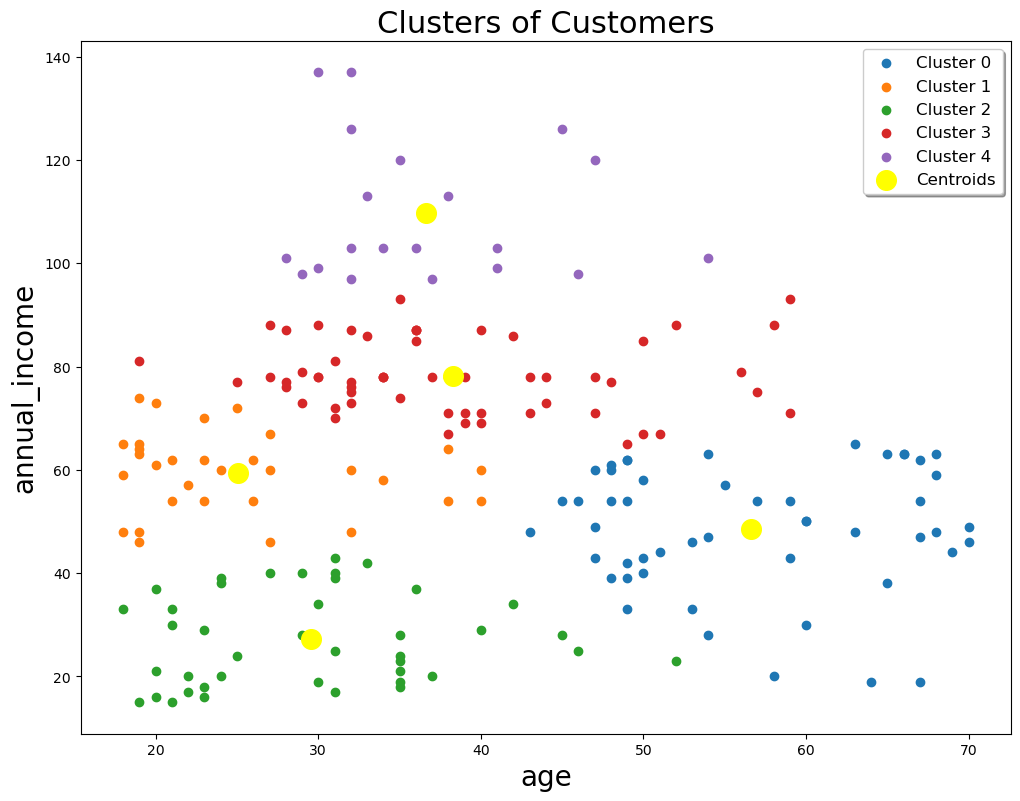

In [101]:
plt.figure(figsize=(12,9))
plt.title('Clusters of Customers', fontsize=22)
# clusters >>
for i in range(cn):
 plt.scatter(X[y_km==i,0], X[y_km==i,1],
             label ='Cluster '+str(i))
plt.xlabel(df.columns[c1], fontsize=20)
plt.ylabel(df.columns[c2], fontsize=20)
# centroids >>
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=200, c='yellow', label = 'Centroids')
plt.legend(loc='best', fontsize=12, shadow=True)

In [108]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(X, color_threshold=1.5)
fig.update_layout(width=1000, height=700)
fig.show()

In [15]:
import webbrowser
import matplotlib.pyplot as plt
import pandas as pd
'''
import yahoo_fin.stock_info as si
'''
import yfinance as yf
import numpy as np
from sklearn.cluster import KMeans

In [17]:
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
webbrowser.open(sp500_url)
# get tickers
data_table = pd.read_html(sp500_url)
data_table[0].Symbol = data_table[0].Symbol.str.replace(".", "-")
tickers = data_table[0].Symbol.to_list()
'''
tickers_ = si.tickers_sp500(include_company_data = True)
display(tickers_)
tickers = tickers_.Symbol.to_list()
'''
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C

C:\Users\mixas\AppData\Local\Temp\ipykernel_19560\3138556319.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_table[0].Symbol = data_table[0].Symbol.str.replace(".", "-")


In [24]:
start='2022-04-01'
end = '2022-05-01'
'''
data=pd.DataFrame()
for i in tickers:
 print(i, end=' ')
 try:
   tmp=si.get_data(i,start_date=start,end_date=end)
   data[i]=tmp['adjclose']
 except:
   continue
'''
# get data
## website cannot be accessed using Python sometimes !!! >>>
data = yf.download(tickers, start = start, end = end)
# keep 'Adj Close'
data = data.loc[:,'Adj Close']
# drop the columns where all elements are NaN
df=data.dropna(axis=1, how='all')

[*********************100%%**********************]  503 of 503 completed

5 Failed downloads:
['GEHC', 'KVUE', 'GEV', 'VLTO', 'SOLV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1648785600, endDate = 1651377600")


In [25]:
days=df.shape[0]

# average return and volatility
ret = df.pct_change().mean() #* days
vol = df.pct_change().std() #* np.sqrt(days)

# format the data as a numpy array to feed into the K-Means algorithm
X = np.asarray([ret,vol]).T

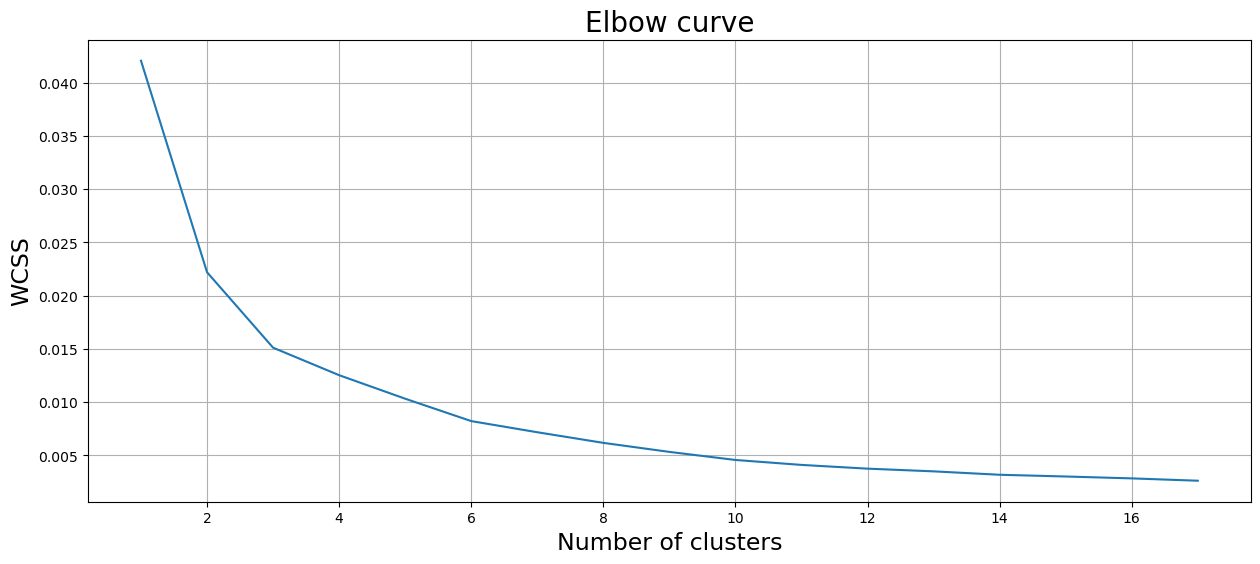

In [26]:
mc = 18

wcss = []
for i in range(1, mc):
    k_means = KMeans(n_clusters=i, init ='k-means++',
                     n_init=10, random_state=0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 6))
plt.title('Elbow curve', fontsize=20)
plt.plot(range(1, mc), wcss)
plt.xlabel('Number of clusters', fontsize=17)
plt.ylabel('WCSS', fontsize=17)
plt.grid(True)

In [27]:
# According to the Elbow graph we deterrmine
# clusters number
cn=5

# Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=cn, init ='k-means++',
                n_init=10, random_state=0)

# fit predict returns for each observation
# which cluster it belongs to
y_km = kmeans.fit_predict(X)

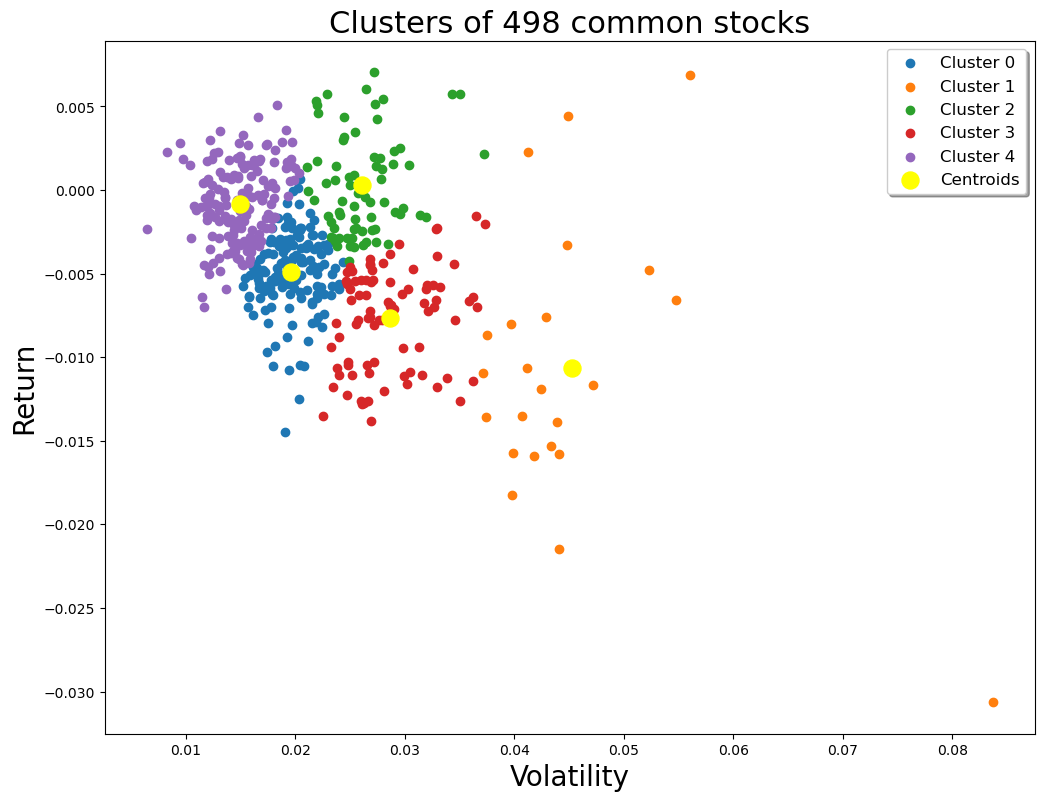

In [28]:
plt.figure(figsize=(12,9))
plt.title('Clusters of '+str(df.shape[1])+' common stocks', fontsize=22)
# clusters >>
for i in range(cn):
 plt.scatter(X[y_km==i,1], X[y_km==i,0],
             label ='Cluster '+str(i))
plt.ylabel('Return', fontsize=20)
plt.xlabel('Volatility', fontsize=20)
# centroids (marker='h', edgecolors='k',) >>
plt.scatter(kmeans.cluster_centers_[:,1],
            kmeans.cluster_centers_[:,0],
            s=150, c='yellow', label = 'Centroids')
plt.legend(loc='best', fontsize=12, shadow=True)

In [29]:
for i in range(cn):
    print('\n\nCluster', i)
    for j in ret.index[y_km==i]:
        print(j, end=' ')



Cluster 0
A AAPL ABBV ABT ACGL ACN ADBE ADM ADP AES AFL AIG AJG ALL AMP AMT AOS APH ARE AVB AVGO AWK AXP BAC BALL BAX BBY BDX BEN BK BLK BR BRO BSX BWA BXP CARR CAT CBOE CBRE CDW CFG CMA CMCSA CME CNC COO COST CPRT CPT CSCO CTSH CVS CVX DD DE DHR DIS DPZ EA EBAY ECL EG EMN EQR F FAST FDS FDX FITB FSLR GM GS HBAN HES HOLX HPE HSIC HWM ICE IFF ILMN IPG IR IT JBL JCI JNPR JPM KEY KEYS LH LLY LOW MAA MDT MLM MMC MOH MS MSI MTD NDAQ NEE NEM NTAP NTRS NVR NWS NWSA OKE OMC ORCL OTIS PAYX PFE PGR PH PNR PRU PSA RCL ROK SBUX SPG STE STLD STX TDY TECH TEL TPR TRGP TRMB TSCO TT TXN UDR UNP UPS VMC VTRS VZ WFC WST WTW XYL ZBH ZBRA ZTS 

Cluster 1
ALGN AMZN CRL ENPH EPAM ETSY FFIV GNRC HCA HPQ ISRG META MPWR MRNA MTCH NFLX NVDA PTC PYPL SMCI TSLA UHS WBD 

Cluster 2
AAL ADI APA AZO BBWI BG BIIB BKNG CEG CF CHRW COF COP CSGP CTRA DAL DECK DFS DVA DVN EL EOG EQIX EQT FI FIS GPN GWW HD HLT HST KMB LEN LULU LUV LW LYV MA MAR MAS MGM MHK MRO MTB NKE NRG NUE NXPI ODFL PCG PHM PLD POOL PSX QRVO RL ROST 